# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [9]:
# Extract all rows of data
table = soup.find('table')
rows = table.find_all('tr')
# Extract headers
headers = [header.text.strip() for header in rows[0].find_all('th')]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols])


In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=headers)

In [15]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [22]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [24]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [26]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [29]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"Number of months on Mars: {num_months}")

Number of months on Mars: 12


In [31]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
print(f"Number of Martian days: {num_sols}")

Number of Martian days: 1867


In [33]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


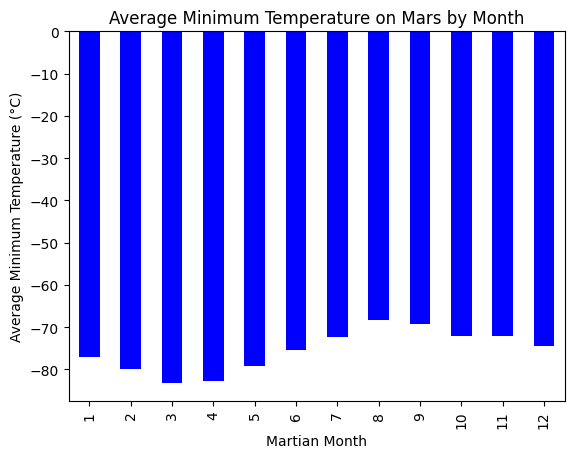

In [35]:
# Plot the average minimum temperature by month

avg_temp_by_month = df.groupby('month')['min_temp'].mean()
avg_temp_by_month.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature on Mars by Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

Coldest month: 3, Hottest month: 8


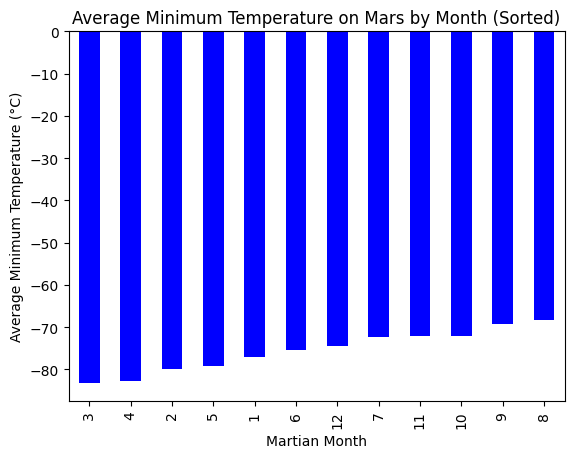

In [37]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the temperatures to find the coldest and hottest months
sorted_temps = avg_temp_by_month.sort_values()

# Identify the coldest and hottest months
coldest_month = sorted_temps.idxmin()
hottest_month = sorted_temps.idxmax()

print(f"Coldest month: {coldest_month}, Hottest month: {hottest_month}")

# Plot sorted temperatures
sorted_temps.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature on Mars by Month (Sorted)')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

In [39]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


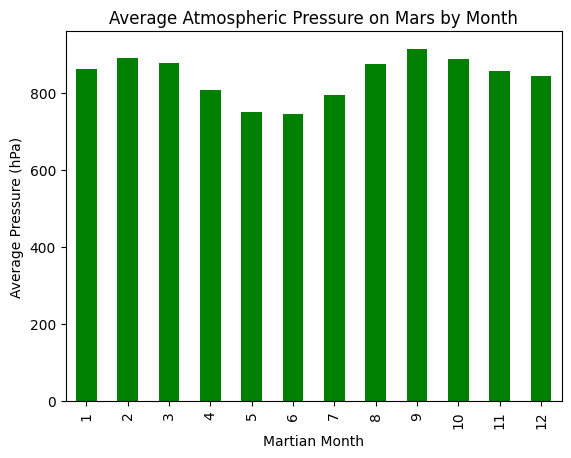

In [41]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', color='green')
plt.title('Average Atmospheric Pressure on Mars by Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure (hPa)')
plt.show()

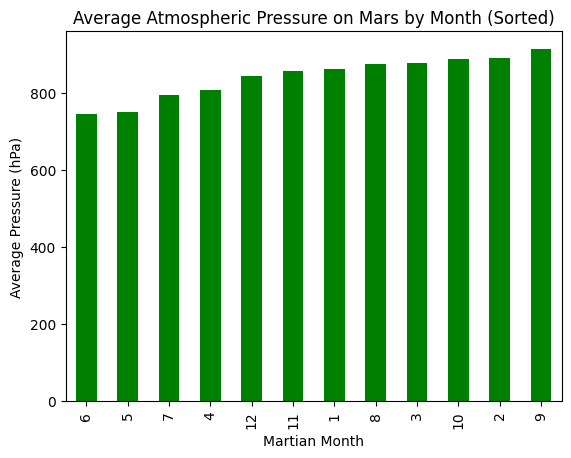

In [43]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the temperatures to find the lowest and highest pressure months
sorted_pressures = avg_pressure_by_month.sort_values()

# Identify the lowest and highest pressure months
lowest_month = sorted_pressures.idxmin()
highest_month = sorted_pressures.idxmax()

# Plot sorted pressures
sorted_pressures.plot(kind='bar', color='green')
plt.title('Average Atmospheric Pressure on Mars by Month (Sorted)')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure (hPa)')
plt.show()

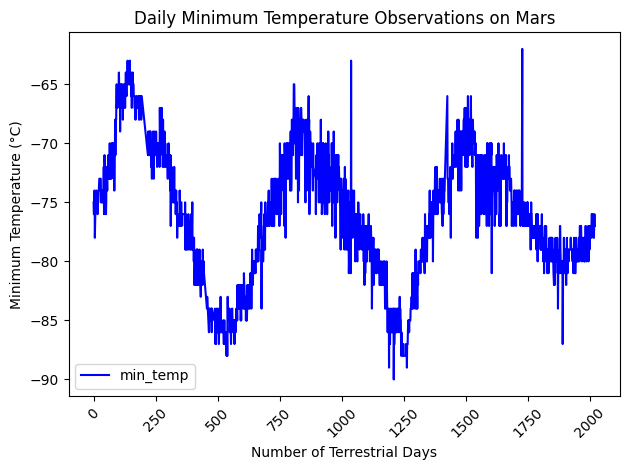

In [51]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df['terrestrial_day_count'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

df.plot(x='terrestrial_day_count', y='min_temp', kind='line', color='blue')
plt.title('Daily Minimum Temperature Observations on Mars')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Note: Manually observe the plot for cyclical patterns

#### Minimum Temperature
The results of my data show:
The coldest month is Month 3 with an average minimum temperature of − 83.31 C..
The warmest month is Month 8 with an average minimum temperature of − 68.38C.
The trend across each year on Mars indicates that it is coldest in the early months of the year heating up until Month 8 then trend back downwards

#### Atmospheric Pressure
The results of my data show:
Lowest Atmospheric Pressure: The month with the lowest average atmospheric pressure is Month 6, with a pressure of 745.05 hPa.
Highest Atmospheric Pressure: The month with the highest average atmospheric pressure is Month 9, with a pressure of 913.31 hPa.
Pressure Trend: The trend across eayear on Marsian year indicates that atmospheric pressure highest in the spring and fall. ns.

#### Year Length
By analyzing the monthly average minimum temperature data, we can observe a cyclical pattern that represents one Martian year. The cycle starts with the coldest temperature in Month 3 (-83.31°C), warms to its peak in Month 8 (-68.38°C), and then begins to cool again.
This 12-month cycle in our data corresponds to one Martian year. Given that we know a Martian year is approximately 687 Earth days long, we can estimate that each Martian month in our data represents about 57.25 Earth days (687 / 12 ≈ 57.25)

Converting to Martian sols:
1 sol ≈ 1.0275 Earth days
Martian year ≈ 687 Earth days / 1.0275 ≈ 668.6 sols
Martian month ≈ 57.25 Earth days / 1.0275 ≈ 55.7 sols
Therefore, our data suggests that a Martian year is about 669 sols long, and each Martian month is approximately 56 sols.
This analysis supports the established understanding of the Martian year length and provides a practical way to interpret the time scales in our temperature data..



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [57]:
# Write the data to a CSV
# Save avg_temp_by_month
avg_temp_by_month.to_csv('mars_avg_temp_by_month.csv', header=True)

# Save avg_pressure_by_month
avg_pressure_by_month.to_csv('mars_avg_pressure_by_month.csv', header=True)

# Save terrestrial_day_count
# Since this is a Series, we'll convert it to a DataFrame first
df[['terrestrial_day_count']].to_csv('mars_terrestrial_day_count.csv', index=False)

print("All files have been saved successfully.")


All files have been saved successfully.


In [59]:
browser.quit()